# REGRESI LINEAR

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from wordcloud import WordCloud

import statsmodels
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt

init_notebook_mode(connected=True) 

import warnings
warnings.filterwarnings('ignore')

import csv
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
data = pd.read_excel("data_akbilgic.xlsx",sep=",")
print(data)

     Year  TL BASED ISE    ISEUSD        SP       DAX      FTSE    NIKKEI  \
0    2009      0.035754  0.038376 -0.004679  0.002193  0.003894  0.000000   
1    2009      0.025426  0.031813  0.007787  0.008455  0.012866  0.004162   
2    2009     -0.028862 -0.026353 -0.030469 -0.017833 -0.028735  0.017293   
3    2009     -0.062208 -0.084716  0.003391 -0.011726 -0.000466 -0.040061   
4    2009      0.009860  0.009658 -0.021533 -0.019873 -0.012710 -0.004474   
..    ...           ...       ...       ...       ...       ...       ...   
531  2011      0.008599  0.013400  0.006238  0.001925  0.007952  0.005717   
532  2011      0.009310  0.015977  0.003071 -0.001186  0.000345  0.002620   
533  2011      0.000191 -0.001653  0.001923  0.002872 -0.000723  0.000568   
534  2011     -0.013069 -0.013706 -0.020742 -0.014239 -0.011275  0.001358   
535  2011     -0.007246 -0.019442  0.000000 -0.000473 -0.002997 -0.017920   

      BOVESPA        EU        EM  
0    0.031190  0.012698  0.028524  
1  

In [4]:
data_x =['SP','DAX','FTSE','NIKKEI','BOVESPA','EU','EM']
X = data[data_x]
Y = data.ISEUSD

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 10 columns):
Year            536 non-null int64
TL BASED ISE    536 non-null float64
ISEUSD          536 non-null float64
SP              536 non-null float64
DAX             536 non-null float64
FTSE            536 non-null float64
NIKKEI          536 non-null float64
BOVESPA         536 non-null float64
EU              536 non-null float64
EM              536 non-null float64
dtypes: float64(9), int64(1)
memory usage: 42.0 KB


In [6]:
data.head()

,Year,TL BASED ISE,ISEUSD,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,536.0,2009.602612,0.615009,2009.000000,2009.000000,2010.000000,2010.000000,2011.000000
TL BASED ISE,536.0,0.001629,0.016264,-0.062208,-0.006669,0.002189,0.010584,0.068952
ISEUSD,536.0,0.001552,0.021122,-0.084716,-0.009753,0.002643,0.013809,0.100621
SP,536.0,0.000643,0.014093,-0.054262,-0.004675,0.000876,0.006706,0.068366
DAX,536.0,0.000721,0.014557,-0.052331,-0.006212,0.000887,0.008224,0.058951
FTSE,536.0,0.000510,0.012656,-0.054816,-0.005808,0.000409,0.007428,0.050323
NIKKEI,536.0,0.000308,0.014850,-0.050448,-0.007407,0.000000,0.007882,0.061229
BOVESPA,536.0,0.000935,0.015751,-0.053849,-0.007215,0.000279,0.008881,0.063792
EU,536.0,0.000471,0.012990,-0.048817,-0.005952,0.000196,0.007792,0.067042
EM,536.0,0.000936,0.010501,-0.038564,-0.004911,0.001077,0.006423,0.047805


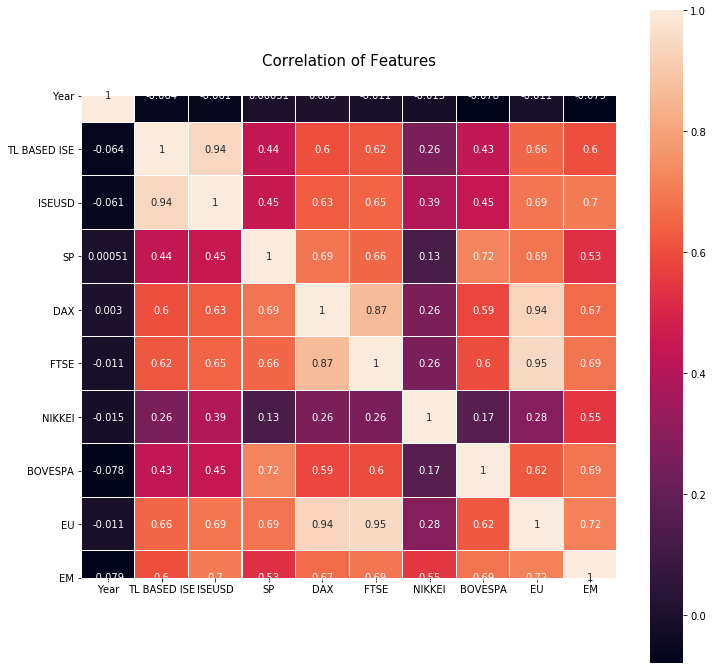

In [8]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True)

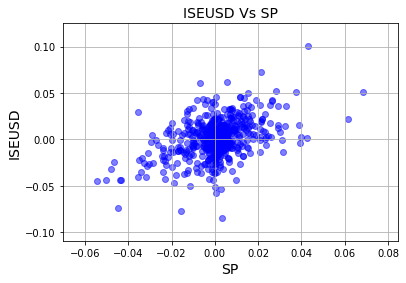

In [9]:
plt.scatter( data['SP'],data['ISEUSD'], color='blue',alpha=.5)
plt.title('ISEUSD Vs SP', fontsize=14)
plt.xlabel('SP', fontsize=14)
plt.ylabel('ISEUSD', fontsize=14)
plt.grid(True)
plt.show()

Berdasarkan hasil sebaran data prp semakin meningkat saat myct bernilai rendah yang mengindikasikan terdapat korelasi disimpulkan dengan MYCT

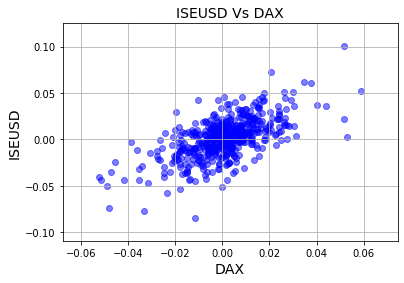

In [10]:
plt.scatter( data['DAX'],data['ISEUSD'], color='blue',alpha=.5)
plt.title('ISEUSD Vs DAX', fontsize=14)
plt.xlabel('DAX', fontsize=14)
plt.ylabel('ISEUSD', fontsize=14)
plt.grid(True)
plt.show()

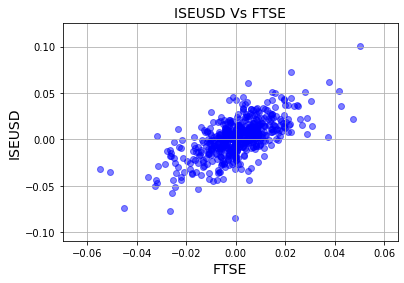

In [11]:
plt.scatter( data['FTSE'],data['ISEUSD'], color='blue',alpha=.5)
plt.title('ISEUSD Vs FTSE', fontsize=14)
plt.xlabel('FTSE', fontsize=14)
plt.ylabel('ISEUSD', fontsize=14)
plt.grid(True)
plt.show()

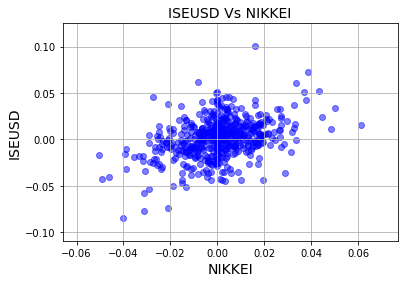

In [34]:
plt.scatter( data['NIKKEI'],data['ISEUSD'], color='blue',alpha=.5)
plt.title('ISEUSD Vs NIKKEI', fontsize=14)
plt.xlabel('NIKKEI', fontsize=14)
plt.ylabel('ISEUSD', fontsize=14)
plt.grid(True)
plt.show()

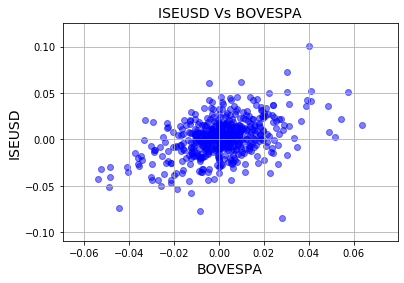

In [12]:
plt.scatter( data['BOVESPA'],data['ISEUSD'], color='blue',alpha=.5)
plt.title('ISEUSD Vs BOVESPA', fontsize=14)
plt.xlabel('BOVESPA', fontsize=14)
plt.ylabel('ISEUSD', fontsize=14)
plt.grid(True)
plt.show()

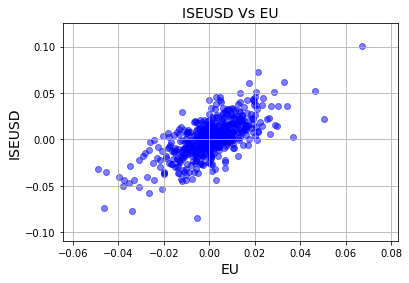

In [13]:
plt.scatter( data['EU'],data['ISEUSD'], color='blue',alpha=.5)
plt.title('ISEUSD Vs EU', fontsize=14)
plt.xlabel('EU', fontsize=14)
plt.ylabel('ISEUSD', fontsize=14)
plt.grid(True)
plt.show()

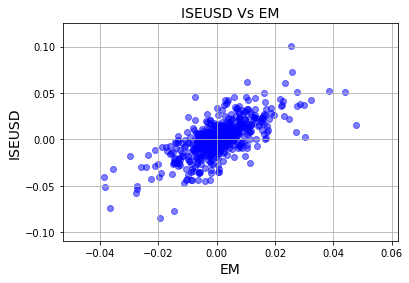

In [14]:
plt.scatter( data['EM'],data['ISEUSD'], color='blue',alpha=.5)
plt.title('ISEUSD Vs EM', fontsize=14)
plt.xlabel('EM', fontsize=14)
plt.ylabel('ISEUSD', fontsize=14)
plt.grid(True)
plt.show()

Berdasarkan hasil sebaran data terdapat kecenderungan korelasi positif 

# Estimase Model Regresi

RMSE =  0.013530783363750246
R Square: 0.5819189425950104
intercept: 0.00016089729315032966
slope: [ 0.0822968  -0.25689976 -0.26996275  0.06374947 -0.29658309  1.23759974
  1.026947  ]


,Coefficient
SP,0.082297
DAX,-0.256900
FTSE,-0.269963
NIKKEI,0.063749
BOVESPA,-0.296583
EU,1.237600
EM,1.026947


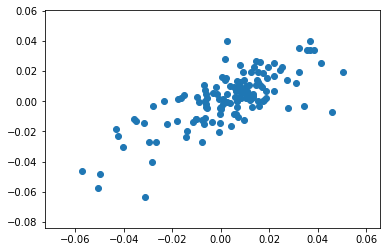

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=1)
model =LinearRegression()

model.fit(X_train,y_train)

y_pred=model.predict( X_test)
plt.scatter(y_test,y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('RMSE = ',RMSE)
r_sq = model.score(X, Y)
intercept = model.intercept_
coef = model.coef_
print('R Square:', r_sq)
print('intercept:', intercept)
print('slope:',coef)
pd.DataFrame(data=model.coef_, index=X.columns, columns=['Coefficient'])

Berdasarkan hasil regresi didapatkan Bahwa Pengembalian Bursa Efek Istanbul = 0.00016089729315032966 + 0.0822968 SP -0.25689976 DAX + -0.26996275 FTSE + 0.06374947 NIKKEI -0.29658309 BOVESPA + 1.23759974 EU +1.026947 EM